# Business Understanding

The company is looking to expand into new industries to diversify its portfolio. They are primarily interested in purchasing and operating airplanes for commercial enterprises, and are wanting to look into the potential risks of aircraft. Through the use of Aviation Accident data recorded by the National Transportation Safety Board, we will identify aircraft that pose the lowest risk to help the company come to a decision for its first aircraft purchases.

# Data Understanding

The aviation accident data recorded by the National Transportation Safety Board, includes aviation accidents recorded from 1962 to 2023. This data contains records for civil aviation accidents and selected incidents in the United States as well as international waters for aerial vehicles ranging from gliders and balloons, to jet planes for both commercial and military.

In [1]:
# Importing the necessary tools
import pandas as pd

pd.options.mode.copy_on_write = True

In [2]:
# Importing 'Aviation_Data.csv'
aviation_data = pd.read_csv('data/Aviation_Data.csv' )

<ipython-input-2-ce5c09ce1237>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('data/Aviation_Data.csv' )


## Data Preparation/Cleaning

For Data Preperation and cleaning, I first create a new dataframe from the aviation data that contains the columns that will be the most benificial. From there I normalize the column names and start dropping rows with with values that do not fit the commercial plane criteria.

In [3]:
# Creating a new dataframe with specific columns
avi_records = aviation_data[['Aircraft.Category', 'Make', 'Model', 'Engine.Type', 'Number.of.Engines',
                             'Aircraft.damage', 'Injury.Severity', 'Weather.Condition', 'Event.Date']]

In [4]:
avi_records.columns = avi_records.columns.str.lower()

In [5]:
avi_records = avi_records.rename(columns=lambda name: name.replace('.', '_'))
avi_records.head(3)

,aircraft_category,make,model,engine_type,number_of_engines,aircraft_damage,injury_severity,weather_condition,event_date
0,NaN,Stinson,108-3,Reciprocating,1.0,Destroyed,Fatal(2),UNK,1948-10-24
1,NaN,Piper,PA24-180,Reciprocating,1.0,Destroyed,Fatal(4),UNK,1962-07-19
2,NaN,Cessna,172M,Reciprocating,1.0,Destroyed,Fatal(3),IMC,1974-08-30


In [6]:
# Turning strings in 'Make' to title to make values uniform
avi_records['make'] = avi_records['make'].str.title()
avi_records.head(3)

,aircraft_category,make,model,engine_type,number_of_engines,aircraft_damage,injury_severity,weather_condition,event_date
0,NaN,Stinson,108-3,Reciprocating,1.0,Destroyed,Fatal(2),UNK,1948-10-24
1,NaN,Piper,PA24-180,Reciprocating,1.0,Destroyed,Fatal(4),UNK,1962-07-19
2,NaN,Cessna,172M,Reciprocating,1.0,Destroyed,Fatal(3),IMC,1974-08-30


In [7]:
# Converting date from obj to datetime
avi_records['event_date'] = pd.to_datetime(avi_records['event_date'], format='ISO8601')

In [8]:
# Dropping rows with unwanted engine types and keeping NaN
unwanted_eng_type = ['Reciprocating', 'Turbo Prop', 'Electric', 'Hybrid Rocket', 'Turbo Shaft',
                    'LR', 'NONE', 'UNK']
avi_records = avi_records[~avi_records['engine_type'].isin(unwanted_eng_type)]

In [9]:
# Dropping rows with unwanted Aircraft Category and keeping NaN
unwanted_craft_cate = ['Helicopter', 'Glider', 'Balloon', 'Weight-Shift','Gyrocraft', 'WSFT', 
                       'Ultralight', 'Powered Parachute', 'Powered-Lift', 'ULTR', 'UNK', 'Unknown']
avi_records = avi_records[~avi_records['aircraft_category'].isin(unwanted_craft_cate)]

In [10]:
# Dropping rows with unwanted number of engines and keeping NaN
unwanted_num_engine = [0, 1, 6]
avi_records = avi_records[~avi_records['number_of_engines'].isin(unwanted_num_engine)]

Since the company is wanting to branch out to the commercial side of aircraft, I did some research to find the leading companies for commercial aircraft. The two major aircraft manufacturers for commercial use are Boeing and Airbus. To narrow down the dataset to these two companies, I first double check if there are any company name variances in the dataset and then replace the variances with the respective company's commonly used name.

In [11]:
# First checking to see if company names were inputed properly
avi_records[avi_records['make'].str.contains('Boeing', case=False, na=False)].make.value_counts()

make
Boeing                            2344
Boeing Company                       9
The Boeing Company                   9
Boeing Vertol                        1
Boeing Company, Long Beach Div       1
Boeing 777-306Er                     1
Boeing Commercial Airplane Gro       1
Name: count, dtype: int64

In [12]:
avi_records[avi_records['make'].str.contains('Airbus', case=False, na=False)].make.value_counts()

make
Airbus               270
Airbus Industrie     161
Airbus Industries      1
Name: count, dtype: int64

In [13]:
# Replacing Boeing and Airbus name variants with commonly used names.
avi_records['make'] = avi_records['make'].replace(['Boeing Company', 'The Boeing Company', 'Boeing Vertol',
                                                   'Boeing Company, Long Beach Div', 'Boeing 777-306Er',
                                                   'Boeing Commercial Airplane Gro'], 'Boeing')

In [14]:
avi_records['make'] = avi_records['make'].replace(['Airbus Industrie', 'Airbus Industries'], 'Airbus')

### Cleaning Boeing Dataframe

After cleaning company names, I create a dataframe for each individual company to further clean as well as further narrow the values in the "model" column to show aircraft still in production for [Airbus](https://www.airbus.com/en/products-services/commercial-aircraft/passenger-aircraft 'Airbus Passenger Aircraft'), and [Boeing](https://www.boeing.com/commercial#products-and-services 'Boeing Commercial Aircraft') based off of the individual companies website product list.

In [15]:
# Creating a dataframe with Boeing specific aircraft
boeing = avi_records[avi_records['make'].str.contains('Boeing', na=False)]
boeing.head(3)

,aircraft_category,make,model,engine_type,number_of_engines,aircraft_damage,injury_severity,weather_condition,event_date
84,NaN,Boeing,737-222,Turbo Fan,2.0,Destroyed,Fatal(78),IMC,1982-01-13
320,Airplane,Boeing,B737-2H4,Turbo Jet,2.0,Minor,Incident,IMC,1982-02-15
344,NaN,Boeing,727-235,Turbo Fan,3.0,Substantial,Non-Fatal,VMC,1982-02-17


In [16]:
boeing_production = ['B777', 'B-777', '777', '737-291', '737']
boeing = boeing[boeing['model'].isin(boeing_production)]

After some research on the B777, and 737-291 I concluded that these planes are the same Models as the 777 and 737 aircrafts so I replace those values with their commonly used model name.

In [17]:
# Cleaning the Boeing dataframe
boeing['model'] = boeing['model'].str.replace('B-777', '777')

In [18]:
boeing['model'] = boeing['model'].str.replace('B777', '777')

In [19]:
boeing['model'] = boeing['model'].str.replace('737-291', '737')

In [20]:
boeing = boeing[~boeing['aircraft_damage'].isin(['Unknown'])]

In [21]:
boeing['engine_type'] = boeing['engine_type'].replace('Unknown', 'Turbo Fan')

### Cleaning Airbus Dataframe

In [22]:
# Creating a dataframe with Airbus specific aircraft
airbus = avi_records[avi_records['make'].str.contains('Airbus', na=False)]
airbus.head(3)

,aircraft_category,make,model,engine_type,number_of_engines,aircraft_damage,injury_severity,weather_condition,event_date
6737,NaN,Airbus,A-300B4-2C,Turbo Fan,2.0,Minor,Incident,VMC,1983-11-06
11775,NaN,Airbus,A-300B4-2C,Turbo Fan,2.0,NaN,Non-Fatal,IMC,1985-05-28
13699,NaN,Airbus,A-300 B4-203,Turbo Fan,2.0,Minor,Incident,VMC,1985-12-30


In [23]:
# updating airbus dataframe to have only aircraft still in production
airbus_production = ['A320-211', 'A-320-211', 'A-320', 'A320', 'A330',
                     'A320-321', 'A320-233', '320', 'A321', 'Airbus A330',
                     'A320 211', '321', 'A320 - 216', 'A320 - 211', '330', 
                     'A320 233', 'A321-271N', 'A220', 'A320-271N', 'A320-251N',
                     '220']
airbus = airbus[airbus['model'].isin(airbus_production)]

In [24]:
# Cleaning the Airbus dataframe
airbus['model'] = airbus['model'].str.replace('A320 233', 'A320-233')

In [25]:
airbus['model'] = airbus['model'].str.replace('A320 211', 'A320-211')

In [26]:
airbus['model'] = airbus['model'].str.replace('Airbus A330', 'A330')

In [27]:
airbus['model'] = airbus['model'].str.replace(' ', '')

In [28]:
airbus['model'] = airbus['model'].str.replace('A-320', 'A320')

In [29]:
airbus['model'] = airbus['model'].apply(lambda x: 'A' + x if not x.startswith('A') else x)

### Combining Datasets

In [30]:
# Combining the two datasets
top_manufacturers = pd.concat([boeing, airbus])

In [31]:
# Completing the last of the cleaning to remove NaN values
top_manufacturers['aircraft_category'] = top_manufacturers['aircraft_category'].fillna('Airplane')

In [32]:
top_manufacturers['engine_type'] = top_manufacturers['engine_type'].fillna('Turbo Fan')

In [33]:
top_manufacturers['number_of_engines'] = top_manufacturers['number_of_engines'].fillna(2.0)

In [34]:
top_manufacturers['weather_condition'] = top_manufacturers['weather_condition'].fillna('UNK')

In [35]:
top_manufacturers = top_manufacturers.dropna(subset= ['aircraft_damage', 'injury_severity', 'event_date'])

In [36]:
# Removing numbers and symbols from 'injury_severity' to make values uniform
top_manufacturers['injury_severity'] = top_manufacturers['injury_severity'].apply(lambda x: ''.join(y for y in x if not y.isdigit()))

In [37]:
top_manufacturers['injury_severity'] = top_manufacturers['injury_severity'].str.replace('Fatal()', 'Fatal')
top_manufacturers['injury_severity'].value_counts()

injury_severity
Non-Fatal    164
Fatal         31
Incident      13
Name: count, dtype: int64

In [38]:
# Reseting index now that the dataset is cleaned.
top_manufacturers = top_manufacturers.reset_index(drop=True)
top_manufacturers.head()

,aircraft_category,make,model,engine_type,number_of_engines,aircraft_damage,injury_severity,weather_condition,event_date
0,Airplane,Boeing,737,Turbo Fan,2.0,Minor,Incident,VMC,1982-08-05
1,Airplane,Boeing,737,Turbo Fan,2.0,Minor,Incident,IMC,1982-08-12
2,Airplane,Boeing,737,Turbo Jet,2.0,Destroyed,Fatal,VMC,1991-03-03
3,Airplane,Boeing,737,Turbo Fan,2.0,Substantial,Non-Fatal,VMC,1991-10-16
4,Airplane,Boeing,777,Turbo Fan,2.0,Substantial,Non-Fatal,VMC,1997-05-14


In [39]:
# Saving a cleaned dataset as CSV
top_manufacturers.to_csv('data/cleaned_top_manufacturers_df.csv')

# Exploratory Data Analysis

In [40]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


### Overall Data 
Overall, the Boeing 737 appears the most in the dataset, but that doesn’t necessarily mean that it is a high-risk aircraft. Due to its popularity and reliability, it is a highly sought-out aircraft. The Airbus aircraft, namely the Airbus A220 appears once in the dataset. That alone is enough to give this aircraft high praise for its safety and reliability.

([<matplotlib.axis.YTick at 0x2288a24d7f0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100'),
  Text(0, 110, '110'),
  Text(0, 120, '120'),
  Text(0, 130, '130')])

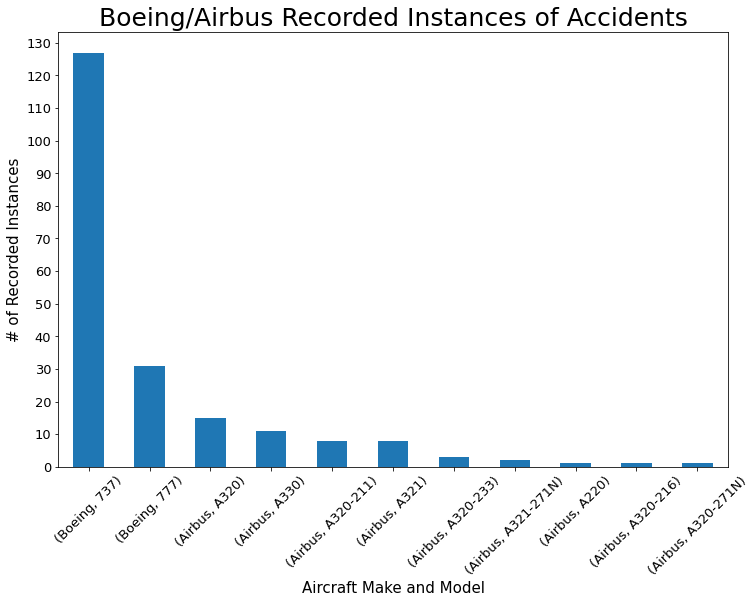

In [41]:
# Graph of overall data
top_manufacturers[['make','model']].value_counts().plot.bar(figsize=(12, 8), fontsize=13, rot=45)

plt.title('Boeing/Airbus Recorded Instances of Accidents', fontsize=25)
plt.xlabel('Aircraft Make and Model', fontsize=15)
plt.ylabel('# of Recorded Instances', fontsize=15)
plt.yticks(range(0, 140, 10))

### Recorded Damage
The overall damage shows promising results with minor damage being the majority outcome for most of the aircraft present in the dataset, then followed by substantial damage, and destroyed.

([<matplotlib.axis.YTick at 0x2288a336c40>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45'),
  Text(0, 50, '50'),
  Text(0, 55, '55'),
  Text(0, 60, '60'),
  Text(0, 65, '65')])

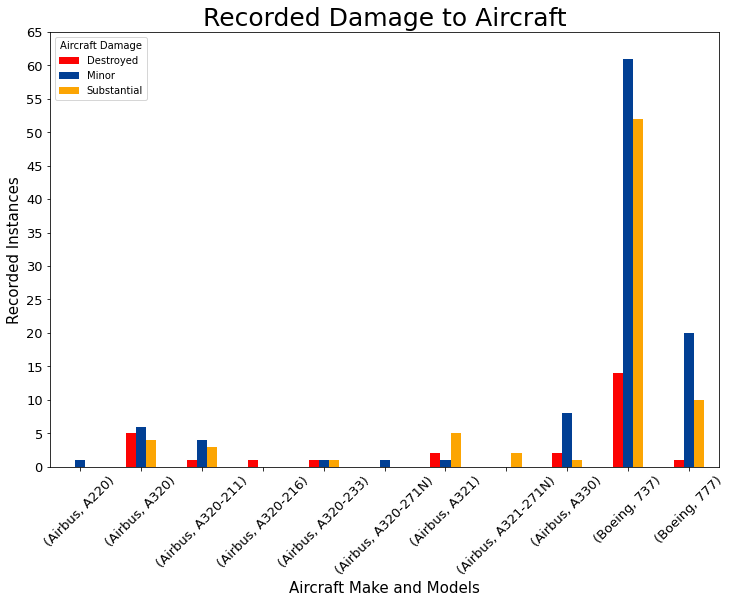

In [42]:
# Recorded damage for each aircraft in the dataset
top_manufacturers.groupby(['make', 'model', 'aircraft_damage']).size().unstack().plot(kind='bar', color=['#fc0303', '#013f94', '#fca503'], figsize=(12, 8), fontsize=13, rot=45)

plt.title('Recorded Damage to Aircraft', fontsize=25)
plt.legend(title='Aircraft Damage')
plt.xlabel('Aircraft Make and Models', fontsize=15)
plt.ylabel('Recorded Instances', fontsize=15)
plt.yticks(range(0, 70, 5))

### Injury Severity
Just like the damage to aircraft, the injury severity also shows a great overall outcome for these incidents where the best outcome in any kind of aircraft-related accidents is Non-Fatal. Unfortunately, the next outcome is Fatal, followed by Incidents. Despite the Boeing 737 holding the most records on this dataset, the majority and by a large margin is non-fatal, which speaks volumes towards the aircraft’s safety.

([<matplotlib.axis.YTick at 0x2288a44ddc0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100'),
  Text(0, 110, '110'),
  Text(0, 120, '120'),
  Text(0, 130, '130')])

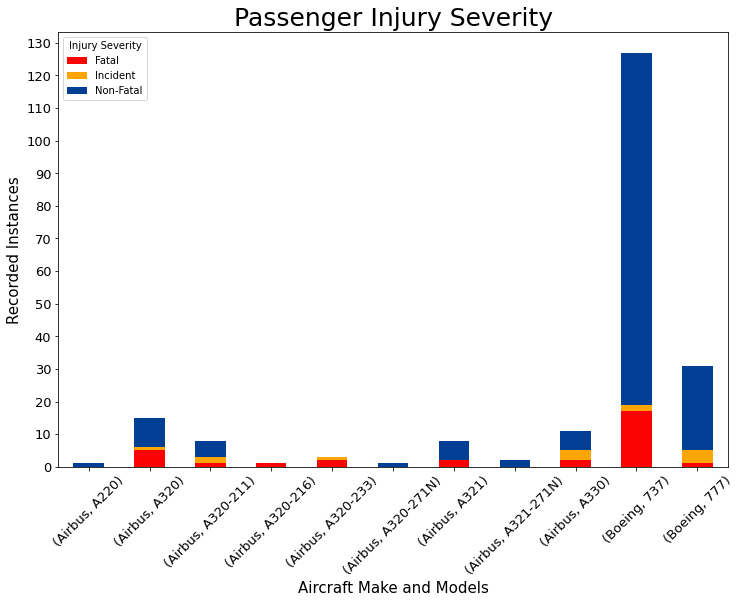

In [43]:
# Passenger injury severity
top_manufacturers.groupby(['make', 'model', 'injury_severity']).size().unstack().plot(kind='bar', stacked=True, color=['#fc0303', '#fca503', '#013f94'], figsize=(12, 8), fontsize=13, rot=45)

plt.title('Passenger Injury Severity', fontsize=25)
plt.legend(title='Injury Severity')
plt.xlabel('Aircraft Make and Models', fontsize=15)
plt.ylabel('Recorded Instances', fontsize=15)
plt.yticks(range(0, 140, 10))

## Conclusions

The analysis of this data helps with answering the following questions to narrow down a low-risk aircraft.

**Which Aircraft has the highest damage severity overall?**
The aircraft that holds the highest damage severity would be the Boeing 737, mainly due to its overwhelming number of records. If you were to compare records based off the damage outcome of the aircraft, then the Airbus A320 would have the highest severity as its destroyed outcome is almost equal to its minor damage outcome.

**Which aircraft holds the highest fatalities as compared to no fatalities?**
By comparing the injury severity outcomes, the Airbus A320 holds the most fatalities based on its fatal to non-fatal ratio. The Boeing 737 on the other hand has a high non-fatal outcome compared to its fatal outcomes.

**Which Aircraft poses the lowest risk to the company to begin this new endeavor?**
While its impossible to say that this one aircraft will cause no problems during its time of service, it is possible to find one or even a few that will be of low-risk to the company starting off. Going off just the data, the Airbus A220 could be considered low risk as it only has 1 recorded accident, and it ended with both minor damage to the aircraft, and no fatalities. The Boeing 737 overwhelming data count also works in its favor to qualify as a low-risk aircraft since most recorded damage is in the minor category, and its injury severity is majority non-fatal.


## Limitations

A major limitation with this dataset is that from the very beginning it contains a significant amount of null values or unknowns that could make the data be as accurate as possible. Another limitation from this dataset is that it only shows the recorded accidents these planes have experienced since thier first flight, and it doesn't exactly show the success flight rate for each aircraft.

## Recommendations

While the commercial aircraft has been narrowed down to 3, I believe further research and comparison of these aircraft is necessary to find out where each aircraft excels or falls short to ensure not only safety of the potential consumer, but for the success of the company in this field.

## Next Steps

Further analyzing the data could also give a better understanding of the safety of each aircraft, and how over the years the safety rating of each individual aircraft has advanced.

Also, exploring data that contains successful flight records either on a daily, weekly, or monthly basis for these aircraft can further help to identify a low-risk aircraft by comparing overall data of recorded accidents to overall successful flights.

If possible, getting record data of what the causes of these aircraft accidents can help further narrow down a low-risk aircraft. For example that kind of data could potentially give better insight on how well these aircraft operate in unpredictable weather, or if was system failures that caused these accidents, over human error.